In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r'C:\Users\Emma\Desktop\En Chin 2024\MITB\IS630 Stat Thinking for Data Science\Group Project\estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition\ObesityDataSet_raw_and_data_sinthetic.csv')

df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


[Click here to visit Data Description](https://doi.org/10.1016/j.dib.2019.104344)ar.

In [4]:
df.describe(include='all')

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,2111,2111.000000,2111.000000,2111.000000,2111,2111,2111.000000,2111.000000,2111,2111,2111.000000,2111,2111.000000,2111.000000,2111,2111,2111
unique,2,NaN,NaN,NaN,2,2,NaN,NaN,4,2,NaN,2,NaN,NaN,4,5,7
top,Male,NaN,NaN,NaN,yes,yes,NaN,NaN,Sometimes,no,NaN,no,NaN,NaN,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,NaN,NaN,NaN,1726,1866,NaN,NaN,1765,2067,NaN,2015,NaN,NaN,1401,1580,351
mean,NaN,24.312600,1.701677,86.586058,NaN,NaN,2.419043,2.685628,NaN,NaN,2.008011,NaN,1.010298,0.657866,NaN,NaN,NaN
std,NaN,6.345968,0.093305,26.191172,NaN,NaN,0.533927,0.778039,NaN,NaN,0.612953,NaN,0.850592,0.608927,NaN,NaN,NaN
min,NaN,14.000000,1.450000,39.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,19.947192,1.630000,65.473343,NaN,NaN,2.000000,2.658738,NaN,NaN,1.584812,NaN,0.124505,0.000000,NaN,NaN,NaN
50%,NaN,22.777890,1.700499,83.000000,NaN,NaN,2.385502,3.000000,NaN,NaN,2.000000,NaN,1.000000,0.625350,NaN,NaN,NaN
75%,NaN,26.000000,1.768464,107.430682,NaN,NaN,3.000000,3.000000,NaN,NaN,2.477420,NaN,1.666678,1.000000,NaN,NaN,NaN


In [5]:
# Define a threshold for unique values to distinguish between categorical and continuous
threshold = 20  # Adjust threshold as needed

categorical_columns = []
continuous_columns = []
non_numeric_categorical_columns = []

# Classify columns as categorical (numeric or non-numeric) or continuous
for column in df.columns:
    if df[column].dtype == 'object':  # Non-numeric categorical if object type (string)
        categorical_columns.append(column)
        non_numeric_categorical_columns.append(column)
    elif df[column].dtype == 'bool':  # Boolean data is categorical
        categorical_columns.append(column)
        non_numeric_categorical_columns.append(column)
    elif df[column].dtype in ['int64', 'float64']:  # Numeric columns
        if df[column].nunique() <= threshold:  # Few unique values, likely categorical
            categorical_columns.append(column)
        else:  # Many unique values, likely continuous
            continuous_columns.append(column)

# Print categorized columns
print(f"Continuous columns: {continuous_columns}")
print(f"Categorical columns: {categorical_columns}")


# Sort numerical categorical values
for column in categorical_columns:
    if df[column].dtype in ['int64', 'float64']:  # Only sort if numeric
        unique_values = sorted(df[column].unique())
        print(f"Sorted unique values for categorical column '{column}': {unique_values}")

# Print and sort unique values for non-numeric categorical columns
for column in non_numeric_categorical_columns:
    unique_values = sorted(df[column].unique())
    print(f"Unique values for non-numeric categorical column '{column}': {unique_values}")

Continuous columns: ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
Categorical columns: ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']
Unique values for non-numeric categorical column 'Gender': ['Female', 'Male']
Unique values for non-numeric categorical column 'family_history_with_overweight': ['no', 'yes']
Unique values for non-numeric categorical column 'FAVC': ['no', 'yes']
Unique values for non-numeric categorical column 'CAEC': ['Always', 'Frequently', 'Sometimes', 'no']
Unique values for non-numeric categorical column 'SMOKE': ['no', 'yes']
Unique values for non-numeric categorical column 'SCC': ['no', 'yes']
Unique values for non-numeric categorical column 'CALC': ['Always', 'Frequently', 'Sometimes', 'no']
Unique values for non-numeric categorical column 'MTRANS': ['Automobile', 'Bike', 'Motorbike', 'Public_Transportation', 'Walking']
Unique values for non-numeric categorical column 'NObeyesdad': [

In [6]:
# Define a threshold for unique values to distinguish between categorical and continuous
threshold = 20  # Adjust this threshold if necessary

categorical_columns = []
continuous_columns = []
non_numeric_categorical_columns = []

# Classify columns
for column in df.columns:
    if df[column].dtype == 'object':  # Non-numeric categorical (e.g., strings)
        categorical_columns.append(column)
        non_numeric_categorical_columns.append(column)
    elif df[column].dtype == 'bool':  # Boolean data (True/False) is categorical
        categorical_columns.append(column)
        non_numeric_categorical_columns.append(column)
    elif df[column].dtype in ['int64', 'float64']:  # For numeric columns
        if df[column].nunique() <= threshold:  # Few unique values, likely categorical
            categorical_columns.append(column)
        else:  # Many unique values, likely continuous
            continuous_columns.append(column)

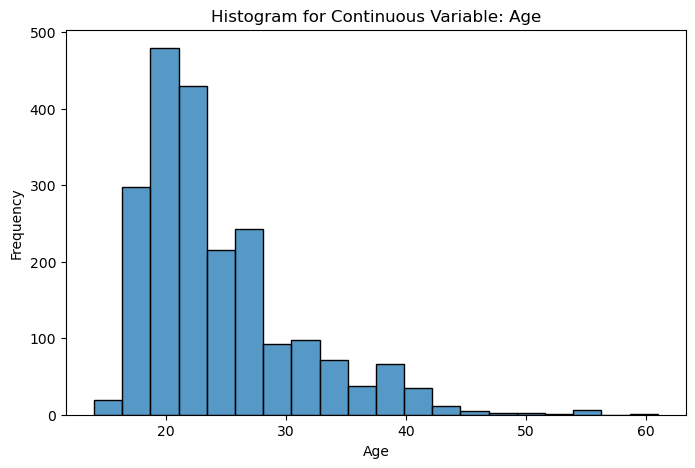

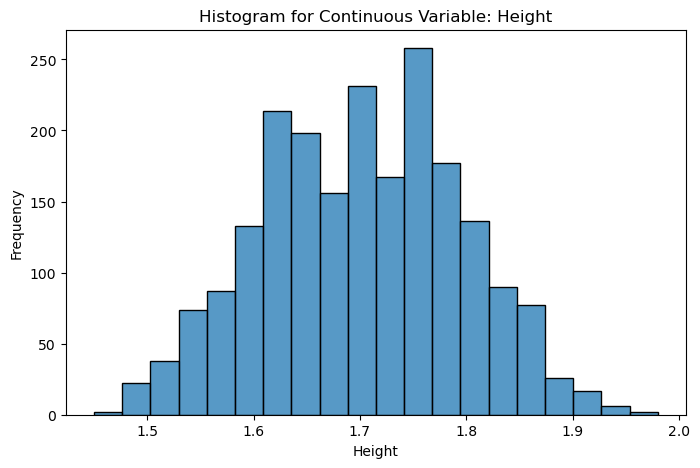

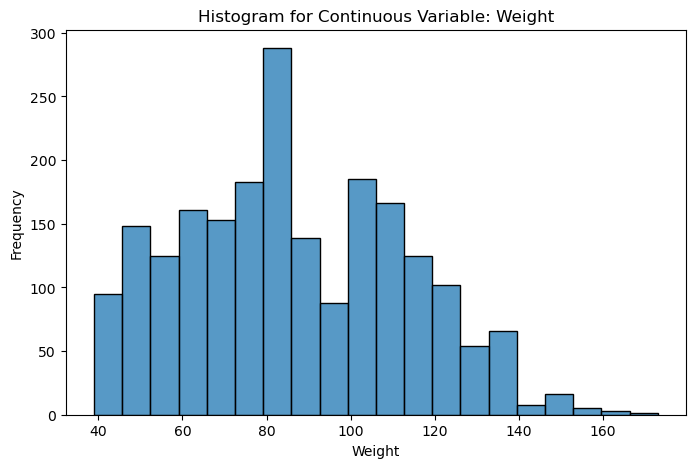

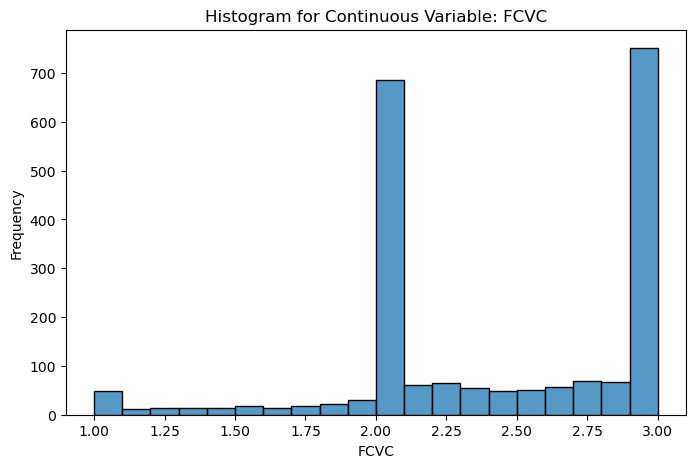

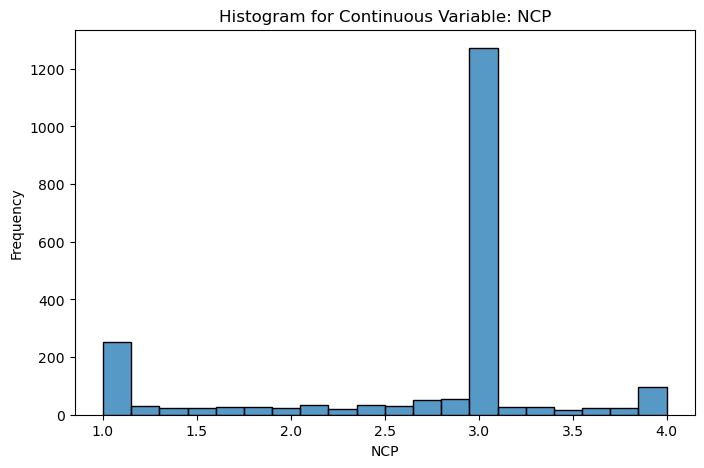

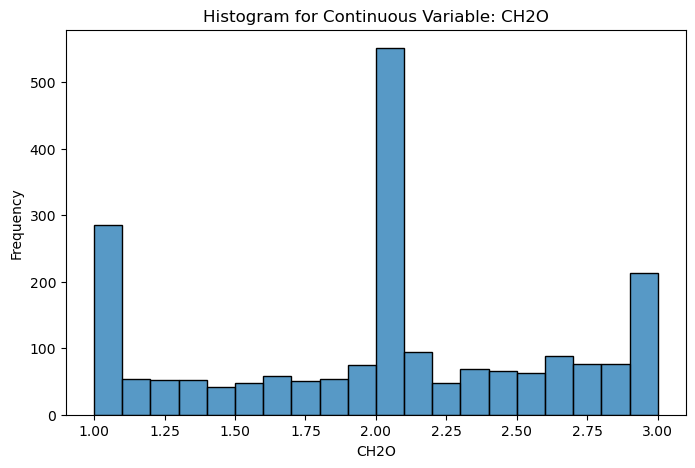

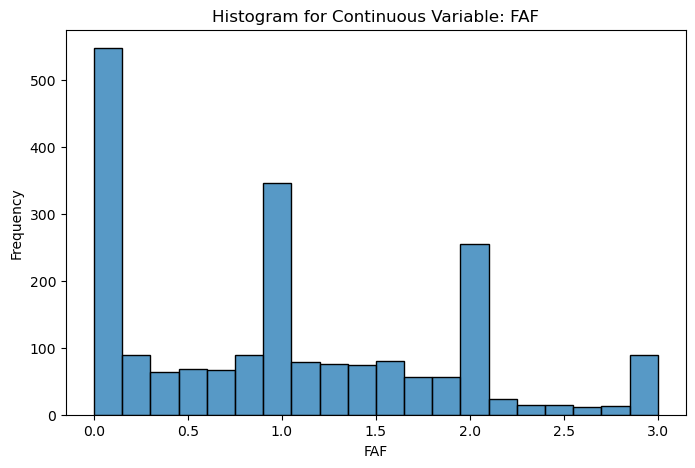

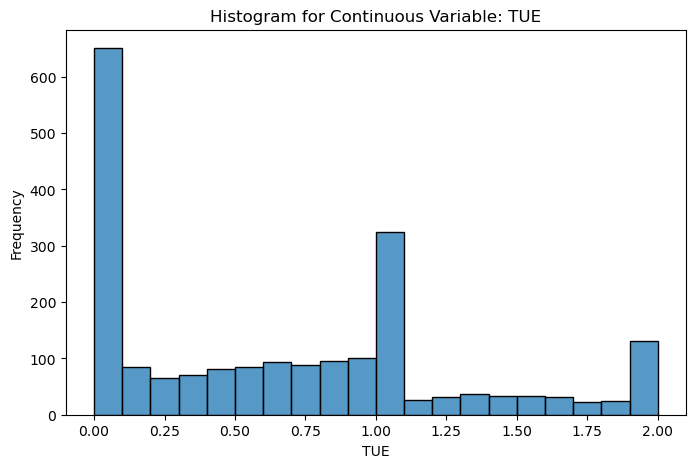

In [7]:
# Plot histograms for continuous variables
for column in continuous_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[column], kde=False, bins=20)  # Histogram for continuous data
    plt.title(f'Histogram for Continuous Variable: {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [19]:
# Plot histograms (as bar plots) for categorical numerical variables
for column in categorical_columns:
    if df[column].dtype in ['int64', 'float64']:  # Only numeric categorical columns
        plt.figure(figsize=(8, 5))
        sns.countplot(x=column, data=df)  # Countplot shows frequency for categorical data
        plt.title(f'Count Plot for Categorical Numerical Variable: {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

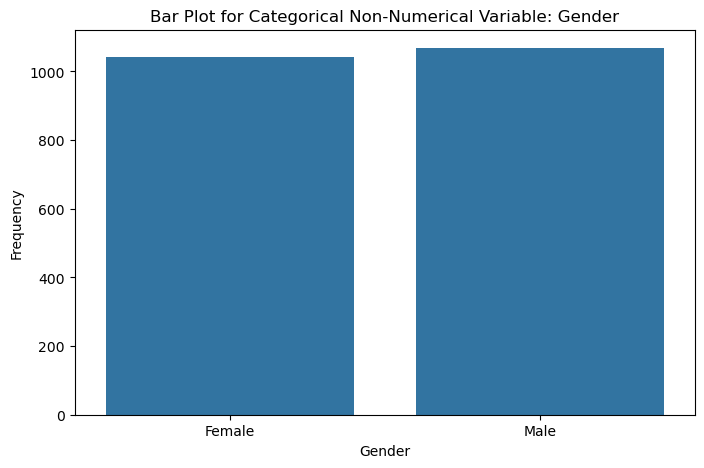

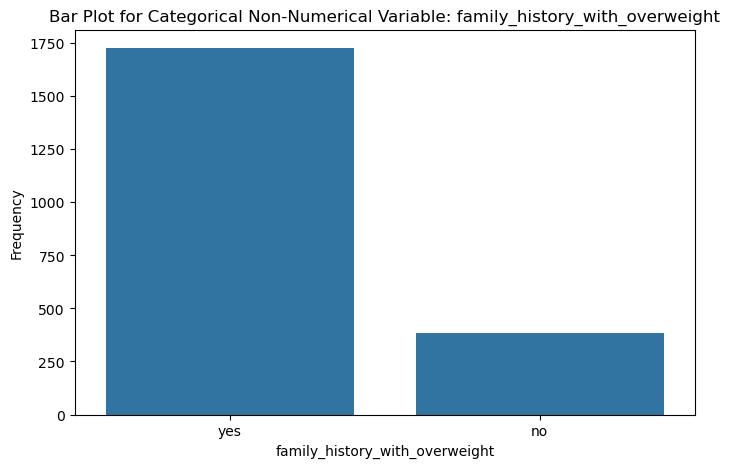

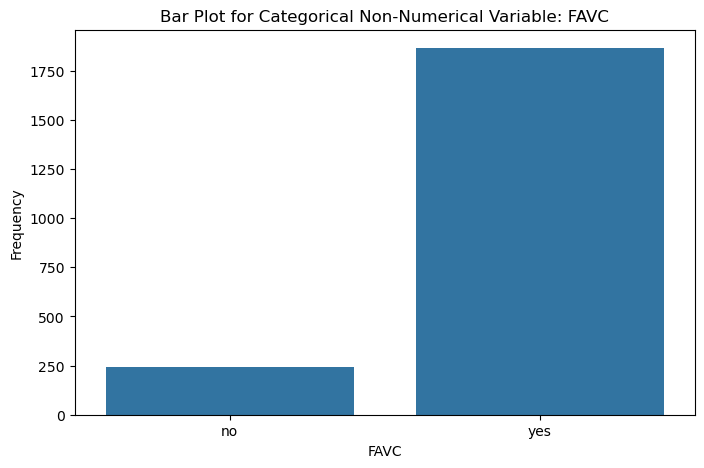

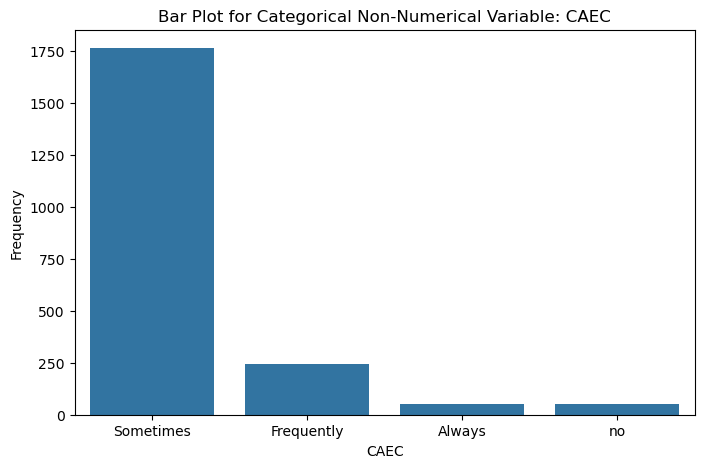

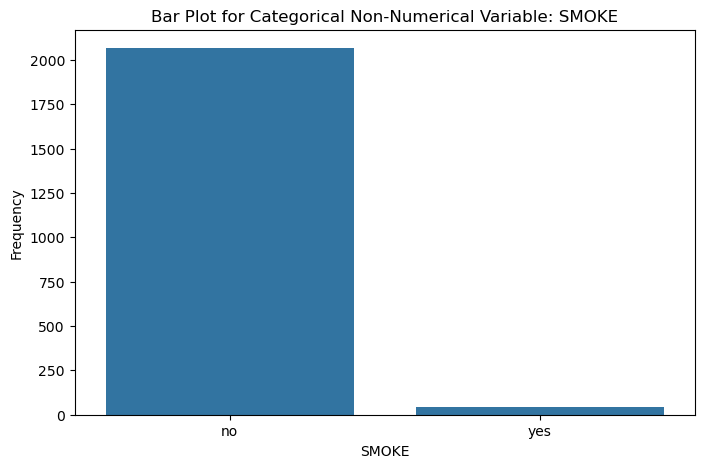

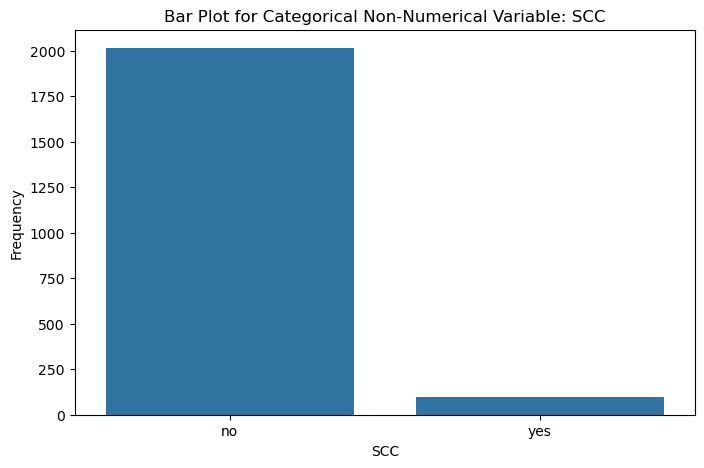

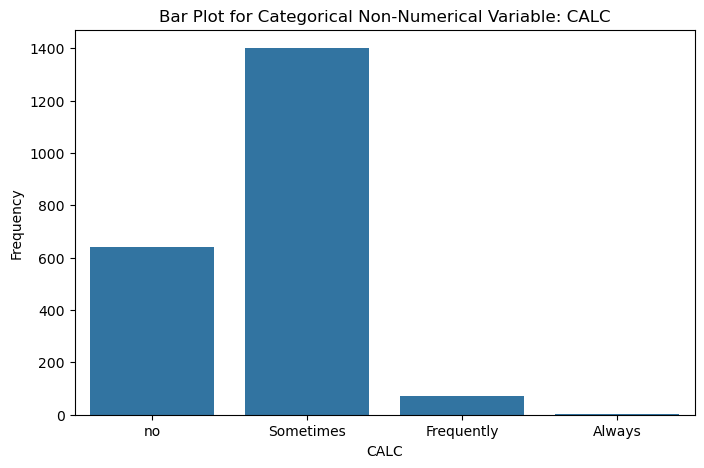

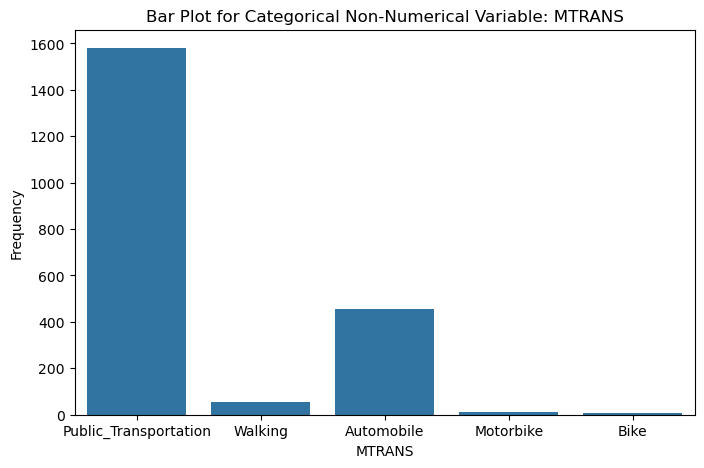

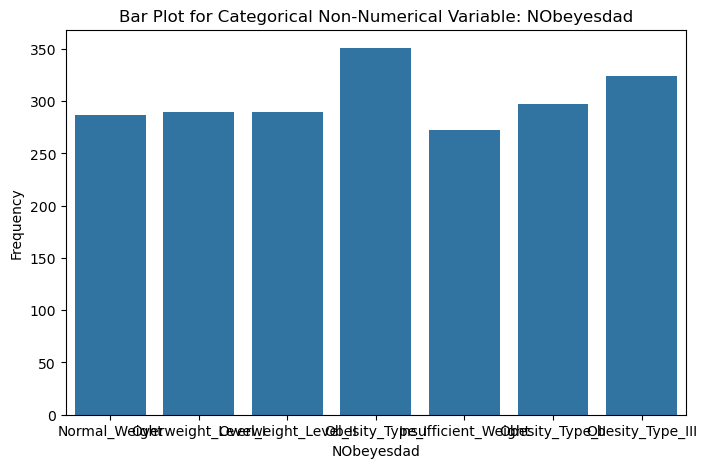

In [21]:
# Plot bar plots for non-numeric categorical variables
for column in non_numeric_categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=column, data=df)  # Countplot for non-numeric categories
    plt.title(f'Bar Plot for Categorical Non-Numerical Variable: {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()